# Product recommendation engine
---
![](resources/groceries.jpg)

## Main objective:
---
Imagine we are a grocery store owner, and we are trying to maximize the purchases of our customers per visit. 

A first strategy that comes to our mind is placing products next to each other that are usually bought together.

Since we have succesfully completed a Data Science task in the past we immediately realize that this problem can be formulated as a recommendation task.


The machine learning part has the following goal:


Essentially we will try to predict the last item of a customers purchase list, given all the other items that he has already in his shopping basket. Those predictions are a helpful first heuristic for the placement of certain products in our grocery store. 

Thus we start collecting the purchase histories of past customers and start writing down the following steps needed, to build our recommendation pipeline:


### Plan of attack:
1. Load the customer purchase data, located in 'data/training_data.csv', 'data/training_labels.csv'
    - Note on the dataset: Each row in each of the data files refers to one 'incomplete' item-list of a customers purchase.
    - The labels represent the item that was purchased by the customer in addition to the items in the dataset
    
    
2. Plot the following statistics:
    - histogram of 10 most purchased products
    - pie chart of all product purchase frequencies
    - which other interesting plots can you think of ? -> extra points



3. Compute and present the following results(you are free to choose any method to present your results):
    - Find the pair of products, that are bought together the most
    - How many customers purchased all the products 
    - Which product was the least purchased ?


4. Transform it into a Machine learning-classifier digestable format:
    - Machine learning algorithms consume data, that has a unified format!
    - For example it should look like that:
    
    
    | feature 1(e.g. product/grocery): | feature 2: | ... | feature N: |
    | "apple"                          | "banana"   | ... | mango      |
    --------------------------------------------------------------------
    | no                               | yes        | ... | no         | <- customer 1: purchased only banana 
    --------------------------------------------------------------------
    | yes                              | yes        | ... | yes        | <- customer 2: purchased all 3 shown
    -------------------------------------------------------------------- 
                                .
                                .
                                .
    --------------------------------------------------------------------
    | no                              | no         | ... | no          | <- customer N: purchased nothing
    --------------------------------------------------------------------
    


5. Train your model on the training set, and predict an item for the each row in the test set(DON'T change the order of the test set):
    - Item-predictions should be in the original string format(=item name)



6. Save the predictions for the test set in a csv-file


### Note on implementation:
- You are free to use any classification algorithm that you want. If you find better recommendation approaches on the web(there certainly are better, but also more involved ones), you are free to use those. The main goal though will be to 
- Try to implement classes


### Note on grading:
- End result = 25%
- Clean code(e.g. classes instead of script like functions etc.) = 25 %
- Documentation = 25%
- Usage of numpy, pandas, pyplot etc. functions for faster computation = 25%

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 90
import tensorflow as tf
import torch

In [43]:
train_x = pd.read_csv('data/training_data.csv', header=None)
test_x = pd.read_csv('data/test_data.csv', header=None)
train_y = pd.read_csv('data/training_labels.csv', header=None)

In [44]:
train_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,salmon,vegetables mix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,toothpaste,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,herb & pepper,shrimp,milk,spinach,cake,chili,green tea,light mayo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
data = train_x
new_data = pd.get_dummies(data, prefix='')
nn_data = new_data.groupby(axis = 1, level = 0).sum()
nn_data.columns = nn_data.columns.str.replace("_", "")
nn_data.index = ["Custom No." + str(index) for index in nn_data.index]
nn_data.to_csv("new_data.csv")
nn_data

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
Custom No.0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Custom No.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Custom No.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Custom No.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Custom No.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Custom No.6743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Custom No.6744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Custom No.6745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Custom No.6746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


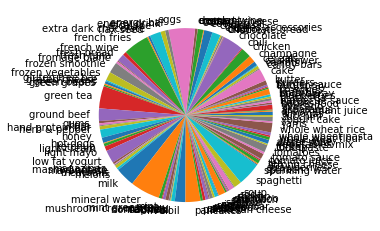

In [46]:
mpie = nn_data.apply(sum)
plt.pie(x=mpie.values, labels=mpie.index)
plt.show()

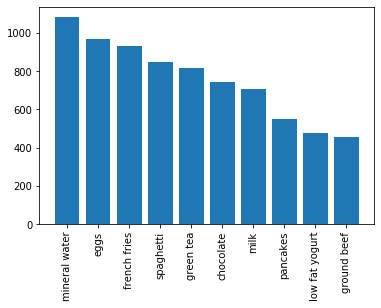

In [47]:
number = nn_data.apply(sum).sort_values(ascending = False)[:10]
plt.bar([0,1,2,3,4,5,6,7,8,9], number.values)
plt.xticks([0,1,2,3,4,5,6,7,8,9], number.index, rotation='90')
plt.show()
#number.hist()

In [48]:
def GetPair(nn_data):
    adata = np.asarray(nn_data)*0.5
    best_comb = 0
    best = [[]]
    for sft in range(59):
        ndata = np.hstack((adata[:,sft+1:], adata[:,:sft+1]))
        ndata = ((np.floor(ndata + adata)).sum(axis=0))
        dmax = ndata.max()
        if best_comb < dmax:
            best_comb = dmax
            best = [[ndata.argmax(), sft+1]]
        elif best_comb == dmax:
            best.append([[ndata.argmax(), sft+1]])
    return best

best = GetPair(nn_data)
best

[[71, 28]]

In [49]:
#if best[1] + best[0] > 118, columns = n -119  
nn_data.columns[best[0][0]],nn_data.columns[best[0][0]+best[0][1]]

('mineral water', 'spaghetti')

5. Train your model on the training set, and predict an item for the each row in the test set(DON'T change the order of the test set):
    - Item-predictions should be in the original string format(=item name)



6. Save the predictions for the test set in a csv-file

In [50]:
#pd.get_dummies(list(nn_data.columns))
pd.get_dummies(list(train_y[0]))

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,tomatoes,toothpaste,turkey,vegetables mix,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:

###### GET THE TRAIN TARGET UNIQUE LIST #####
def Get_train_targets(train_y):
    train_y_dummies = pd.get_dummies(list(train_y[0]))

    # get a dictionary
    product_dict = {}
    for i,product in enumerate(nn_data.columns):
        product_dict[product] = i

    #rename the dummies
    train_y_idx = train_y_dummies.rename(columns=product_dict)

    #return the idxmax value
    train_targets = train_y_idx.idxmax(axis=1)
    
    return train_targets


In [94]:
class CustomDataset():

    def __init__(self, data, labels):

        self.target = torch.Tensor(labels)
        self.data = torch.Tensor(np.asarray(data))
        
    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        return datapoint[idx], target[idx]

In [95]:
def Get_batch(one_hot_training_data,train_targets):
    # zip the data and target
    training_data = CustomDataset(one_hot_training_data,train_targets)
    # batch the data point
    train_loader = torch.utils.data.DataLoader(training_data, batch_size=40, shuffle=True)